In [5]:
# imports
import pandas as pd
import numpy as np
import re
import string
import networkx as nx
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2
import matplotlib.image as mpimg
import io
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from math import log

# Part 2: What do republican and democratic members tweet about?

_Exercise_ 4: TF-IDF of the republican and democratic tweets.

We will create two documents, one containing the words extracted from tweets of republican members, and the other for Democratic members. We will then use TF-IDF to compare the content of these two documents and create a word-cloud. The procedure you should use is exactly the same you used in exercise 2 of week 7. The main steps are summarized below: 
* Create two large documents, one for the democratic and one for the republican party. Tokenize the pages, and combine the tokens into one long list including all the pages of the members of the same party. 
  * Exclude all twitter handles.
  * Exclude punctuation.
  * Exclude stop words (if you don't know what stop words are, go back and read NLPP1e again).
  * Exclude numbers (since they're difficult to interpret in the word cloud).
  * Set everything to lower case.
  * Compute the TF-IDF for each document.
* Now, create word-cloud for each party. Are these topics less "boring" than the wikipedia topics from a few weeks ago? Why?  Comment on the results.

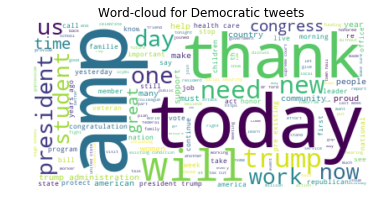

In [ ]:
#Creates an empty .txt-file
f = io.open('Republican.txt', mode='w+', encoding='UTF-8')
f.close()
f = io.open('Democratic.txt', mode='w+', encoding='UTF-8')
f.close()

#Creates a list with all the politicians names from H115_tw.csv
df = pd.read_csv('../../socialgraphs2018/files/data_twitter/H115_tw.csv')
politicians = list(df['tw_name'])

for n in politicians:
    f = io.open('../../socialgraphs2018/files/data_twitter/tweets/'+n, mode="r", encoding='UTF-8')
    str = f.read()
    
    #Excludes all twitter handles, RT, hyperlinks, numbers.
    regx_list = ['@\w*', 'RT', '(http|https):\/\/\w*.\w*\/\w*', '\d']
    for regx in regx_list:
        str = re.sub(regx, '', str)
    
    #Set everything to lower case.
    str = str.lower()
    
    #Fills the two .txt-files with tweets from all the politicians. 
    #One with tweets from Republicans and one with tweets from Democrats
    if df[df.tw_name==n]['Party'].values[0] == 'Democratic':
        f = io.open('Democratic.txt', mode='a+', encoding='UTF-8')
        f.write(str+" ")
        f.close()
    else:
        f = io.open('Republican.txt', mode='a+', encoding='UTF-8')
        f.write(str+" ")
        f.close()
        
    f.close()

#List of stop words, punctuation marks, unicode hex characters and twitter-tags
stop_punct = set(stopwords.words('english') + list(string.punctuation) + ['\xef', '\xe2', '\xcc', '\xe3', '\xf0', 'i\xe2', 't\xe2', 'a\xe2', 'it\xe2', 's\xe2', 'we\xe2', 'and\xe2', 'the\xe2'] + ['rt', 'rm'])

#Tokenize the text in both files and filter the stopwords, punctuation marks, unicode hex characters and twitter-tags
tokenizer = RegexpTokenizer(r'\w+')

fileDem = open("Democratic.txt", mode="r")
textDem = fileDem.read()
filterDem = tokenizer.tokenize(textDem)
filterDem = [word for word in filterDem if word not in stop_punct]

fileRep = open("Republican.txt", mode="r")
textRep = fileRep.read()
filterRep = tokenizer.tokenize(textRep)
filterRep = [word for word in filterRep if word not in stop_punct]    

#Calculates the TF for each word
FDDem = nltk.FreqDist(filterDem)
TFDem = [(i[0], float(i[1]) / float(len(filterDem))) for i in FDDem.most_common(len(FDDem))]
FDRep = nltk.FreqDist(filterRep)
TFRep = [(i[0], float(i[1]) / float(len(filterRep))) for i in FDRep.most_common(len(FDRep))]


#Calculates the IDF for each word
IDFDem = [(i[0], log(len(filterDem) / int(i[1]))) for i in FDDem.most_common(len(FDDem))]
IDFRep = [(i[0], log(len(filterRep) / int(i[1]))) for i in FDRep.most_common(len(FDRep))]

#Compute the TF-IDF for each document



#Create word-cloud for each party
wordcloud = WordCloud(background_color='white').generate(textDem)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word-cloud for Democratic tweets')
plt.axis("off")
plt.show()     

wordcloud = WordCloud(background_color='white').generate(textRep)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word-cloud for Republican tweets')
plt.axis("off")
plt.show()  
